# Data Visualisation - Lab 9 - Dashboards

---

**Author: Claire Rocks**

---

## Setup for the lab
In this lab we are going to introduce some new python packages, **Panel** and **hvplot**.  We'll take you through another worked example and provide some tasks for you to work through at the end.

Many of the libraries you are now very familiar with
* ```Pandas``` - for data manipulation and analysis
  
* ```Numpy``` - for some methematical operations

The new ones are 
* ```Panel``` - an open-source Python library designed to streamline the development of robust tools, dashboards, and complex applications entirely within Python. See https://panel.holoviz.org/index.html
  
* ```hvplot.pandas``` - an extension provided by the hvPlot library that allows users to create interactive visualizations directly from pandas DataFrames.  See https://hvplot.holoviz.org/user_guide/Introduction.html

* ```pn.extension('tabulator')``` - loads the Panel Tabulator extension, which enables the use of Tabulator widgets within Panel applications.  This allows you to create tables that support interactive features like sorting, filtering and pagination.

In [20]:
# pip3 install hvplot panel watchfiles  

# import libraries

import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

## Import Data

The first step is to import CO₂ and Greenhouse Gas Emissions Data from Our World in Data - https://ourworldindata.org/co2-and-greenhouse-gas-emissions#explore-data-on-co2-and-greenhouse-gas-emissions

In [21]:
# import data

df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
df

country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3767956.0           NaN         NaN   
2      Afghanistan  1852      AFG   3783940.0           NaN         NaN   
3      Afghanistan  1853      AFG   3800954.0           NaN         NaN   
4      Afghanistan  1854      AFG   3818038.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
47410     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
47411     Zimbabwe  2019      ZWE  15354606.0           NaN       0.473   
47412     Zimbabwe  2020      ZWE  15669663.0           NaN       0.496   
47413     Zimbabwe  2021      ZWE  15993525.0           NaN       0.531   
47414     Zimbabwe  2022      ZWE  16320539.0           NaN       0.531   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                        NaN     NaN             NaN              NaN  ...   
1                        NaN     NaN             NaN              NaN  ...   
2                        NaN     NaN             NaN              NaN  ...   
3                        NaN     NaN             NaN              NaN  ...   
4                        NaN     NaN             NaN              NaN  ...   
...                      ...     ...             ...              ...  ...   
47410                  0.037  10.715           1.419           15.265  ...   
47411                  0.031   9.775          -0.939           -8.765  ...   
47412                  0.032   7.850          -1.926          -19.700  ...   
47413                  0.033   8.396           0.547            6.962  ...   
47414                  0.033   8.856           0.460            5.477  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
0                         NaN                                   NaN   
1                         NaN                                 0.157   
2                         NaN                                 0.156   
3                         NaN                                 0.156   
4                         NaN                                 0.155   
...                       ...                                   ...   
47410                     NaN                                 0.114   
47411                     NaN                                 0.113   
47412                     NaN                                 0.112   
47413                     NaN                                 0.110   
47414                     NaN                                 0.110   

       temperature_change_from_ch4  temperature_change_from_co2  \
0                              NaN                          NaN   
1                            0.000                        0.000   
2                            0.000                        0.000   
3                            0.000                        0.000   
4                            0.000                        0.000   
...                            ...                          ...   
47410                        0.001                        0.001   
47411                        0.001                        0.001   
47412                        0.001                        0.001   
47413                        0.001                        0.001   
47414                        0.001                        0.001   

       temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                              NaN                          NaN        NaN   
1                            0.000                          0.0        NaN   
2                            0.000                          0.0        NaN   
3                            0.000                          0.0        NaN   
4                            0.000                          0.0        NaN   
...                            ...             

In [22]:
# lets have a look at the columns in the dataframe

df.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [23]:
# filter rows in a pandas DataFrame where the value in the 'country' column is equal to 'World'.
df[df['country'] == 'World']

country  year iso_code    population           gdp  cement_co2  \
46623   World  1750      NaN  7.456641e+08           NaN         NaN   
46624   World  1751      NaN           NaN           NaN         NaN   
46625   World  1752      NaN           NaN           NaN         NaN   
46626   World  1753      NaN           NaN           NaN         NaN   
46627   World  1754      NaN           NaN           NaN         NaN   
...       ...   ...      ...           ...           ...         ...   
46891   World  2018      NaN  7.683790e+09  1.136302e+14    1565.803   
46892   World  2019      NaN  7.764951e+09           NaN    1615.776   
46893   World  2020      NaN  7.840953e+09           NaN    1633.047   
46894   World  2021      NaN  7.909295e+09           NaN    1692.404   
46895   World  2022      NaN  7.975105e+09           NaN    1605.474   

       cement_co2_per_capita        co2  co2_growth_abs  co2_growth_prct  ...  \
46623                    NaN      9.306             NaN              NaN  ...   
46624                    NaN      9.407           0.101            1.088  ...   
46625                    NaN      9.505           0.098            1.041  ...   
46626                    NaN      9.610           0.105            1.108  ...   
46627                    NaN      9.734           0.123            1.281  ...   
...                      ...        ...             ...              ...  ...   
46891                  0.204  36766.945         741.491            2.058  ...   
46892                  0.208  37040.102         273.158            0.743  ...   
46893                  0.208  35007.738       -2032.366           -5.487  ...   
46894                  0.214  36816.543        1808.806            5.167  ...   
46895                  0.201  37149.785         333.242            0.905  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
46623                     NaN                                   NaN   
46624                     NaN                                   NaN   
46625                     NaN                                   NaN   
46626                     NaN                                   NaN   
46627                     NaN                                   NaN   
...                       ...                                   ...   
46891                   100.0                                 100.0   
46892                   100.0                                 100.0   
46893                   100.0                                 100.0   
46894                   100.0                                 100.0   
46895                   100.0                                 100.0   

       temperature_change_from_ch4  temperature_change_from_co2  \
46623                          NaN                          NaN   
46624                          NaN                          NaN   
46625                          NaN                          NaN   
46626                          NaN                          NaN   
46627                          NaN                          NaN   
...                            ...                          ...   
46891                        0.396                        1.064   
46892                        0.401                        1.082   
46893                        0.406                        1.100   
46894                        0.411                        1.118   
46895                        0.417                        1.136   

       temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
46623                          NaN                          NaN        NaN   
46624                          NaN                          NaN        NaN   
46625                          NaN                          NaN        NaN   
46626                          NaN                          NaN        NaN   
46627                          NaN                          NaN        NaN   
...                            ...        

In [24]:
# Fill NAs with 0s and create a GDP per Capita column
df = df.fillna(0)

# a new column called gdp_per_capita, which checks if the value in the population column is not equal to 0.
# If the condition (df['population'] != 0) is true, it calculates the GDP per capita by dividing the value in the gdp column by the value in the population column
# If the condition (df['population'] != 0) is false (i.e., the population is 0), it assigns a value of 0
df['gdp_per_capita'] = np.where(df['population']!=0, df['gdp']/ df['population'], 0)

* ```df.interactive()``` is provided by hvPlot when it is used with Panel. It converts a pandas DataFrame into an interactive DataFrame.  This allows for building interactive data visualizations and dashboards more easily.

In [25]:
# create interactive dataframe
idf = df.interactive()

```pn.widgets``` (in the Panel library) provides a wide range of interactive widgets that can be used to build dashboards.  See https://panel.holoviz.org/reference/index.html#widgets

Here we create an integer slider widget called ```'Year slider'```(which will be displayed alongside the slider).  The starting value of the slider is 1750, the ending value is 2020, the stepsize is 5 and the initial value is 1850 - this sets the initial value of the slider when it is first displayed.

In [7]:
# Define Panel Widgets
year_slider = pn.widgets.IntSlider(name='Year slider',
                                   start=1750,
                                   end=2020,
                                   step=5,
                                   value=1850)
year_slider

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1850)

* Here we create a radio button widget called ```'Y axis'``` (which will be displayed alongside the group of radio buttons).

* ```'options'``` defines the options available for selection, in this case ```'co2'``` and ```'co2_per_capita'```.

* ```'button_type='success'``` specifies the type of button to be used. A button theme should be one of ```'default'``` (white), ```'primary'``` (blue), ```'success'``` (green), ```'info'``` (yellow), or ```'danger'``` (red).

* See https://panel.holoviz.org/reference/widgets/RadioButtonGroup.html

In [26]:
# Radio Buttons for CO2 measures
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['co2','co2_per_capita'],
    button_type='success'
)
yaxis_co2

RadioButtonGroup(button_type='success', name='Y axis', options=['co2', 'co2_per_capita'], value='co2')

Here we create a series of data manipulation operations on the pandas DataFrame (idf) to create a pipeline for processing CO2 emissions data. We do this so that the  when the widgets change, the underlying data for the visualisation is also changed.  This results in a new dataframe called co2_pipeline.

* ```(idf.year <= year_slider) & (idf.country.isin(continents))``` filters rows where the 'year' column in the DataFrame idf is less than or equal to the value of year_slider and where the 'country' column is in the list of continents (continents)

* ```.groupby(['country','year'])[yaxis_co2].mean()``` groups the filtered DataFrame by 'country' and 'year', then computes the mean of the column specified by yaxis_co2 for each group. 

* ```.to_frame()``` converts the result back into a DataFrame.
* ```.reset_index()``` resets the index of the DataFrame, which was set by groupby() - this turns 'country' and 'year' back into columns instead of being part of the index
* ```.sort_values(by='year')``` sorts the DataFrame by the 'year' column in ascending order.
* ```.reset_index(drop=True)``` resets the index of the DataFrame again, dropping the previous index column.

In [9]:
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antartica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country','year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

## Dashboard Planning 

Lets have a think about how we want to display the data.  See the image below.  There is a main title, a side panel with some introductory text - we can also put some interactive controls here.

The Dashboard includes 4 visualisations:

1. A line graph showing CO2 by continent
2. A table of the CO2 by continent data
3. A scatterplot showing CO2 by GDP
4. A bar chart of CO2 sources by continent


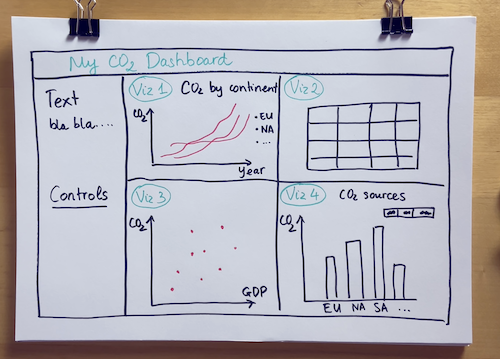

### 1. A line graph showing CO2 by continent

In [10]:
co2_plot = co2_pipeline.hvplot(x='year', by='country', y=yaxis_co2, line_width=2, title='co2 emission by continent')
co2_plot

* ```co2_pipeline``` is the pandas DataFrame resulting from a series of data manipulation steps, as described above. It contains columns like 'country', 'year', and the selected CO2 metric (yaxis_co2).

* ```.hvplot()``` is a method provided by the hvplot library to create nteractive visualizations using the Bokeh plotting library.

* ```x='year'``` specifies that the 'year' column from the DataFrame will be used as the x-axis values for the plot.

* ```by='country'``` groups the data by the 'country' column, creating individual lines or plots for each country.

* ```y=yaxis_co2``` specifies the column name from the DataFrame (co2_pipeline) that will be used as the y-axis values for the plot. yaxis_co2 specifies the name of the column ('co2' or 'co2_per_capita') selected for visualization.

* ```line_width=2``` sets the width of the lines in the plot to 2 units.

* ```title='CO2 Emission by Continent'``` sets the title of the plot.

### 2. A table of the CO2 by continent data

In [11]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')
co2_table

* ```co2_pipeline``` is the pandas DataFrame.

* The ```pipe``` method allows you to apply a function (```pn.widgets.Tabulator``` in this case) to a DataFrame (co2_pipeline).

* ```pn.widgets.Tabulator``` is a widget provided by the Panel library designed for displaying and interacting with tabular data

* ```pagination='remote'``` enables remote pagination, meaning the data is fetched and displayed in chunks as the user navigates through pages. This is useful for handling large datasets efficiently.

* ```page_size=10``` sets the number of rows to display per page in the table.

* ```sizing_mode='stretch_width'``` sets the sizing mode of the table widget. 'stretch_width' makes the table width expand to fill its container.

### 3. A scatterplot showing CO2 by GDP

Here we create a series of data manipulation operations on the pandas DataFrame (idf) to create a new dataset for the co2 vs GDP scatterplot. We do this so that the when the widgets change, the underlying data for the visualisation is also changed.

* ```(idf.year == year_slider) & (idf.country.isin(continents))``` filters rows where the 'year' column in the DataFrame idf is equal to the value of year_slider and where the 'country' column is in the list of continents (continents)

* ```.groupby(['country','year', 'gdp_per_capita'])[co2].mean()``` groups the filtered DataFrame by 'country', 'year' and 'gdp_per_capita', then computes the mean of the column 'co2' for each group.

* ```.to_frame()``` converts the result back into a DataFrame.

* ```.reset_index()``` resets the index of the DataFrame, which was set by groupby() - this turns 'country' and 'year' back into columns instead of being part of the index

* ```.sort_values(by='year')``` sorts the DataFrame by the 'year' column in ascending order.

* ```.reset_index(drop=True)``` resets the index of the DataFrame again, dropping the previous index column.

In [12]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country','year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

Now we create the plot:

* ```co2_vs_gdp_scatterplot_pipeline``` is the pandas DataFrame

* ```.hvplot()``` is a method provided by the hvplot library to create nteractive visualizations using the Bokeh plotting library.

* ```x='gdp_per_capita'``` specifies the column from the DataFrame to use for the x-axis values in the scatter plot.

* ```y='co2'```specifies the column from the DataFrame to use for the y-axis values in the scatter plot.

* ```by='country'``` groups the data by the 'country' column, creating separate data points for each country. Each country's data points are plotted with a unique color or marker.

* ```size=80``` sets the size of the markers to 80 units.

* ```kind='scatter'``` specifies the type of plot to create.

* ```alpha=0.7``` sets the transparency of the markers.

* ```legend=False``` disables the legend in the plot.

* ```height=500, width=500``` specifies the height and width of the plot in pixels

* ```title='CO2 by continent'``` sets the title of the plot.

In [27]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x = 'gdp_per_capita', 
                                                                y = 'co2',
                                                                by='country', 
                                                                size = 80, 
                                                                kind = "scatter", 
                                                                alpha = 0.7,
                                                                legend = False,
                                                                height = 500,
                                                                width = 500,
                                                                title='CO2 by continent')
co2_vs_gdp_scatterplot

### 4. A bar chart of CO2 sources by continent

The following code:

* Creates a new set of radio buttons

* Makes a new list of continents excluding 'World'

* Creates the pipeline dataframe, grouping by country and year and summing by the type of c02 selected by ```'yaxis_co2_source'```

* Creates a bar plot


In [14]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['coal_co2','oil_co2','gas_co2'],
    button_type='default'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antartica']

co2_source_bar_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['country','year'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [15]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind= 'bar', 
                                                     x = 'country', 
                                                     y = yaxis_co2_source,
                                                     title='CO2 source by continent')
co2_source_bar_plot

## Creating the Dashboard

Now we have created the individual plots, we need to combine them together in a Dashboard.  Panel offers different templates to do this - see https://panel.holoviz.org/reference/index.html#templates.  Here we use the FastListTemplate.

* ```title='Dashboard Title'``` sets the title of the dashboard.

* ```sidebar``` defines the content of the sidebar, typically consisting of widgets and explanatory text.

* ```pn.pane.Markdown``` is used to display formatted text (Markdown) in the sidebar.

* ```year_slider``` is our interactive widget allowing users to select a specific year.

* ```main``` specifies the main content area of the dashboard, organized in rows and columns. pn.Row and pn.Column are layout components that organize the placement of plots and other elements

* ```yaxis_co2, co2_plot, co2_table, co2_vs_gdp_scatterplot, yaxis_co2_source, and co2_source_bar_plot``` are our interactive visualizations and widgets.

* ```.panel(width=700)``` and similar calls adjust the width of the components within the layout.

* ```accent_base_color``` and ```header_background``` define the accent colour and background coloor for the template's header and accent elements.

```template.servable()``` makes the dashboard template servable, meaning it can be run and displayed

In [29]:
#Layout using template

template = pn.template.FastListTemplate(
    title='Dashboard Title',
    sidebar = [pn.pane.Markdown("# CO2 Emissions and Climate Change"),
               pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change.  It is widely recognised that..."),
               pn.pane.Markdown("## Settings"),
               year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, co2_plot.panel(width=700), margin = (0, 25)),
                co2_table.panel(width=500)),
         pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin = (0, 25)),
                pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)

#show template
template.servable();


## Viewing the Dashboard

We are going to use a web application to view the Dashboard.  Panel is built on top of Bokeh and uses the Bokeh server to render and serve the applications.

The following command (typed into the terminal) starts a Bokeh server, and allows you to serve your Python code as an interactive web application. 

```panel serve Lab9.ipynb --autoreload```

You will get a message similar to 

Bokeh app running at: http://localhost:5006/Lab9 along with the timestamp and process ID.  This indicates that a Bokeh server application has started successfully and is now running locally on your machine.

Open a web browser and enter http://localhost:5006/Lab9 in the address bar.  This will load the Bokeh application, allowing you to interact with the dashboard.

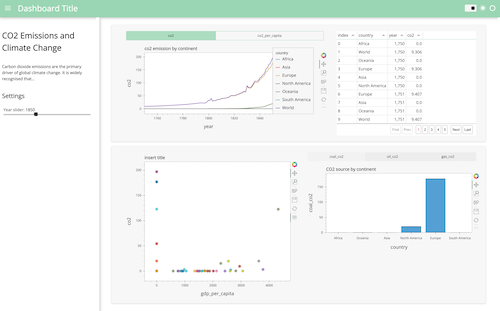

You have now created a pretty good looking interactive Dashboard.  This might run a little bit slow. You could try using matplotlib and setting the matplotlib back-end to "matplotlib.use(‘agg’)" to speed things up.

In [18]:
## import matplotlib
## matplotlib.use('agg')  # Set the backend to 'agg'

## Exercise 1 - Create a Dashboard

Take one of the datasets from the previous labs and create a new dashboard with at least 4 different visualisations.  Try out some of the different templates offered by Panel e.g. EditableTemplate